<a href="https://colab.research.google.com/github/tuxlimr/Celery_Preprocessing/blob/master/LSTM_ICICIBANK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df = yf.download("ICICIBANK.NS", period="5y")

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-05,351.000000,351.850006,348.000000,349.649994,342.882599,22873951
2018-11-06,348.700012,358.299988,347.649994,353.100006,346.265778,21349153
2018-11-07,356.750000,357.000000,354.549988,355.899994,349.011627,2074764
2018-11-09,356.899994,358.100006,352.399994,356.850006,349.943237,15130936
2018-11-12,356.000000,358.200012,351.500000,352.350006,345.530304,10642857


<Axes: xlabel='Date'>

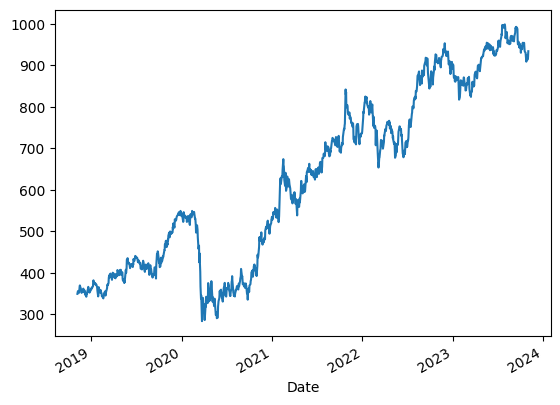

In [92]:
df.Close.plot()

In [93]:
df2 = df.Close

In [94]:
df2

Date
2018-11-05    349.649994
2018-11-06    353.100006
2018-11-07    355.899994
2018-11-09    356.850006
2018-11-12    352.350006
                 ...    
2023-10-30    924.900024
2023-10-31    915.349976
2023-11-01    914.049988
2023-11-02    919.950012
2023-11-03    933.799988
Name: Close, Length: 1236, dtype: float64

In [95]:
df2.reset_index(drop=True, inplace=True)

In [96]:
df2

0       349.649994
1       353.100006
2       355.899994
3       356.850006
4       352.350006
           ...    
1231    924.900024
1232    915.349976
1233    914.049988
1234    919.950012
1235    933.799988
Name: Close, Length: 1236, dtype: float64

In [97]:
df2.shape

(1236,)

In [98]:
df = pd.DataFrame(df2)
df

,Close
0,349.649994
1,353.100006
2,355.899994
3,356.850006
4,352.350006
...,...
1231,924.900024
1232,915.349976
1233,914.049988
1234,919.950012


### Train Test Split

In [99]:
train = df.iloc[:1220]
test = df.iloc[1220:]

In [100]:
train.shape

(1220, 1)

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()

In [103]:
scaler.fit(train)

MinMaxScaler()

In [104]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [105]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

## Creating the Model

In [106]:
length =16
batch_size = 32


In [107]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length= length, batch_size= batch_size)

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [109]:
n_features =1


In [110]:
model= Sequential()
model.add(SimpleRNN(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [111]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_4 (Dropout)         (None, 30)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
model.fit_generator(generator, epochs=10, shuffle=False)

Epoch 1/10


<ipython-input-112-a216c16f3d95>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10, shuffle=False)


38/38 [==============================] - 1s 5ms/step - loss: 0.0133
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 8/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 9/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 10/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0034


### Losses - model.history.history will give you about the loss function

In [113]:
losses = pd.DataFrame(model.history.history)

In [114]:
losses

,loss
0,0.013291
1,0.007258
2,0.005321
3,0.004592
4,0.004650
5,0.004048
6,0.004276
7,0.003699
8,0.004231
9,0.003396


<Axes: >

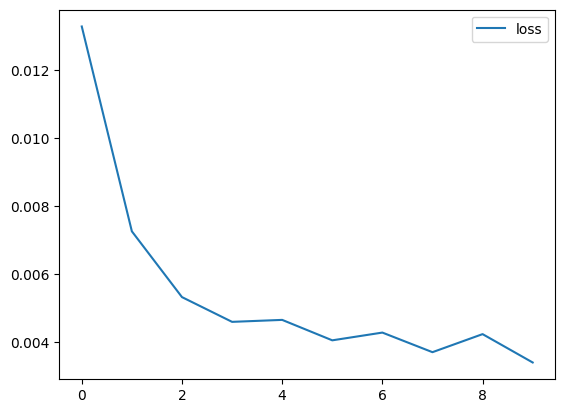

In [115]:
losses.plot()

### Evaluate Data Set

In [116]:
first_eval_batch = scaled_train[-length:]

### These are my last 16 values in dataset

In [117]:
first_eval_batch

array([[0.98866026],
       [0.98439036],
       [0.94540109],
       [0.93280134],
       [0.94127116],
       [0.93056142],
       [0.92272153],
       [0.92202154],
       [0.93504135],
       [0.91880162],
       [0.90445191],
       [0.91957159],
       [0.92566152],
       [0.91642165],
       [0.93406135],
       [0.93672125]])

In [118]:
first_eval_batch = first_eval_batch.reshape((1, length, 1))

In [119]:
first_eval_batch

array([[[0.98866026],
        [0.98439036],
        [0.94540109],
        [0.93280134],
        [0.94127116],
        [0.93056142],
        [0.92272153],
        [0.92202154],
        [0.93504135],
        [0.91880162],
        [0.90445191],
        [0.91957159],
        [0.92566152],
        [0.91642165],
        [0.93406135],
        [0.93672125]]])

In [120]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 234ms/step


array([[0.9209792]], dtype=float32)

In [121]:
test_predictions = []

In [122]:
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 21ms/step


In [123]:
test_predictions

[array([0.9209792], dtype=float32),
 array([0.9047732], dtype=float32),
 array([0.8875526], dtype=float32),
 array([0.88411653], dtype=float32),
 array([0.88160634], dtype=float32),
 array([0.8718416], dtype=float32),
 array([0.8555061], dtype=float32),
 array([0.8510061], dtype=float32),
 array([0.84630364], dtype=float32),
 array([0.83834964], dtype=float32),
 array([0.8300531], dtype=float32),
 array([0.81941026], dtype=float32),
 array([0.81192726], dtype=float32),
 array([0.80642617], dtype=float32),
 array([0.80240256], dtype=float32),
 array([0.79692316], dtype=float32)]

After you get ur reqd. predictions then you may need to get the scaled value back to original value


In [124]:
true_predictions = scaler.inverse_transform(test_predictions)

In [125]:
true_predictions

array([[941.8554326 ],
       [930.27946837],
       [917.9788249 ],
       [915.52442689],
       [913.73139819],
       [906.75645101],
       [895.08801258],
       [891.87364016],
       [888.514681  ],
       [882.83313788],
       [876.9069128 ],
       [869.30474192],
       [863.95963117],
       [860.03020159],
       [857.15613591],
       [853.24220385]])

In [126]:
test['predictions'] = true_predictions

<ipython-input-126-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [127]:
test

,Close,predictions
1220,954.250000,941.855433
1221,951.299988,930.279468
1222,951.400024,917.978825
1223,953.900024,915.524427
1224,943.750000,913.731398
1225,935.750000,906.756451
1226,932.750000,895.088013
1227,929.950012,891.873640
1228,916.099976,888.514681
1229,908.650024,882.833138


<Axes: >

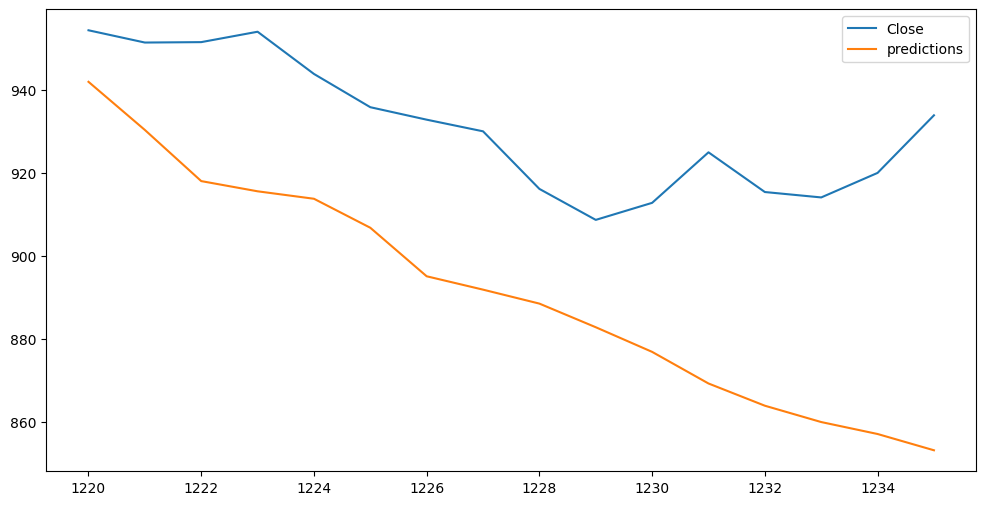

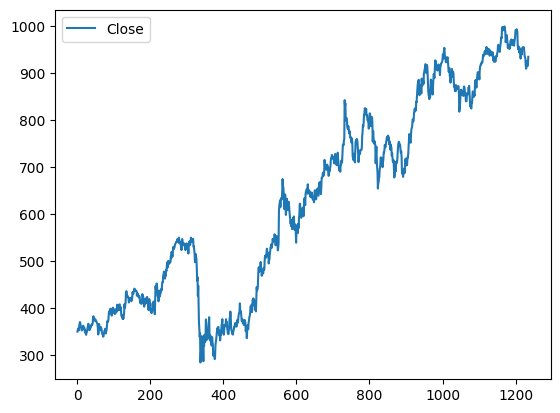

In [128]:
test.plot(figsize=(12,6))
df.plot()

### Let's create now full model


In [129]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [130]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length= length, batch_size= 32)

In [131]:
model= Sequential()
model.add(SimpleRNN(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [132]:
model.fit_generator(generator, epochs=10, shuffle=False)

Epoch 1/10


<ipython-input-132-a216c16f3d95>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10, shuffle=False)


39/39 [==============================] - 1s 5ms/step - loss: 0.0234
Epoch 2/10
39/39 [==============================] - 0s 8ms/step - loss: 0.0203
Epoch 3/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0137
Epoch 4/10
39/39 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 5/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 6/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 7/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 8/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 9/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 10/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0043


In [133]:
losses = pd.DataFrame(model.history.history)

<Axes: >

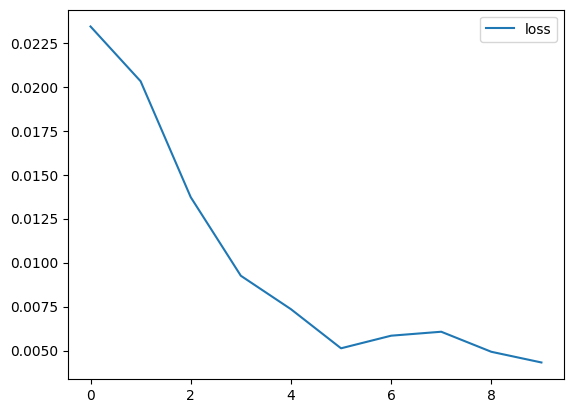

In [134]:
losses.plot()

In [135]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(20):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 22ms/step


In [136]:
forecast = scaler.inverse_transform(forecast)

In [137]:
forecast

array([[962.04499359],
       [965.42553857],
       [963.8840465 ],
       [969.53689367],
       [974.22310449],
       [973.04286636],
       [975.39972369],
       [982.06450765],
       [977.40984535],
       [982.97528482],
       [979.22403412],
       [983.05213377],
       [980.33146797],
       [984.82200134],
       [979.80595738],
       [986.75863752],
       [983.1217023 ],
       [985.39319555],
       [985.91504464],
       [986.13775759]])

In [138]:
forecast.flatten()

array([962.04499359, 965.42553857, 963.8840465 , 969.53689367,
       974.22310449, 973.04286636, 975.39972369, 982.06450765,
       977.40984535, 982.97528482, 979.22403412, 983.05213377,
       980.33146797, 984.82200134, 979.80595738, 986.75863752,
       983.1217023 , 985.39319555, 985.91504464, 986.13775759])

In [139]:
df_array = np.array(df)
df_array

array([[349.6499939 ],
       [353.1000061 ],
       [355.8999939 ],
       ...,
       [914.04998779],
       [919.95001221],
       [933.79998779]])

In [140]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

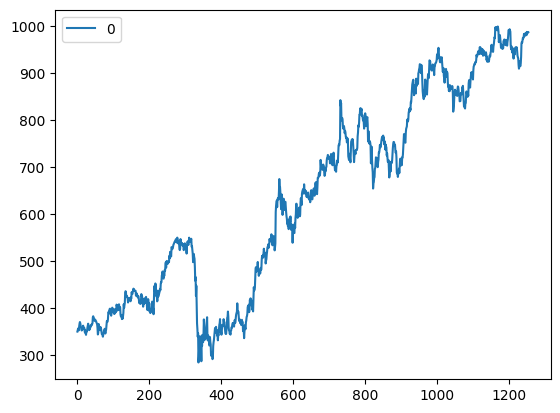

In [141]:
full_data.plot()

### LSTM

In [142]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [143]:
length =16


In [144]:
scaled_test.shape

(16, 1)

In [145]:
length =15

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=32)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=32)






In [146]:
model= Sequential()
model.add(LSTM(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [147]:
model.fit_generator(generator, epochs=20,validation_data=validation_generator, callbacks=[early_stop], shuffle=False)

Epoch 1/20


<ipython-input-147-4612b74385c1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=20,validation_data=validation_generator, callbacks=[early_stop], shuffle=False)


38/38 [==============================] - 3s 22ms/step - loss: 0.0133 - val_loss: 3.5379e-06
Epoch 2/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0133 - val_loss: 0.0022
Epoch 3/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0068 - val_loss: 0.0014


In [148]:
losses = pd.DataFrame(model.history.history)

<Axes: >

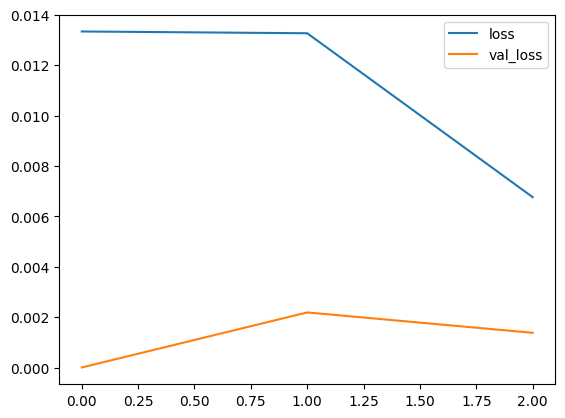

In [149]:
losses.plot()

In [150]:
len(test)

16

In [151]:



test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 23ms/step


<ipython-input-152-0c99d0b30835>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

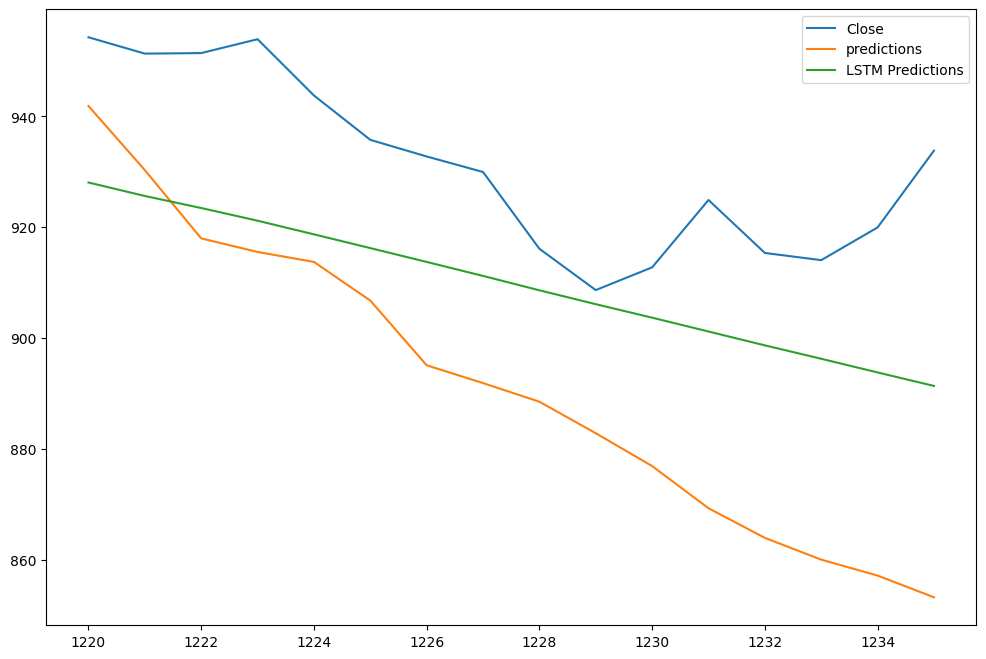

In [152]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [153]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(15):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 34ms/step


In [154]:
forecast = scaler.inverse_transform(forecast)

In [155]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

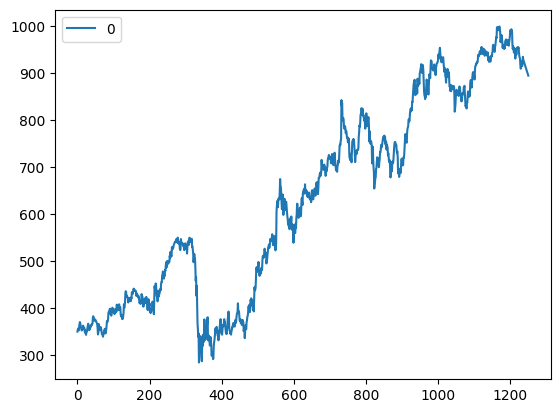

In [156]:
full_data.plot()

In [157]:
forecast

array([[928.05787372],
       [925.62097427],
       [923.45200305],
       [921.16275578],
       [918.70542004],
       [916.22394394],
       [913.7287585 ],
       [911.20589893],
       [908.61223613],
       [906.10755633],
       [903.67610656],
       [901.17926067],
       [898.6818613 ],
       [896.26382284],
       [893.79584321]])

In [158]:
full_data.tail(10)

,0
1241,916.223944
1242,913.728759
1243,911.205899
1244,908.612236
1245,906.107556
1246,903.676107
1247,901.179261
1248,898.681861
1249,896.263823
1250,893.795843


### LSTM without Earlystopping

In [159]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [160]:
length =16


In [161]:
scaled_test.shape

(16, 1)

In [162]:
length =15

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=32)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=32)






In [163]:
model= Sequential()
model.add(LSTM(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [164]:
model.fit_generator(generator, epochs=20,validation_data=validation_generator, shuffle=False)

Epoch 1/20


<ipython-input-164-adc3d56421ea>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=20,validation_data=validation_generator, shuffle=False)


38/38 [==============================] - 3s 21ms/step - loss: 0.0105 - val_loss: 7.8998e-04
Epoch 2/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0099 - val_loss: 0.0033
Epoch 3/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0063 - val_loss: 0.0022
Epoch 4/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0052 - val_loss: 1.2696e-07
Epoch 5/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 6/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 5.3964e-04
Epoch 7/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0042 - val_loss: 0.0010
Epoch 8/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 9/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0020
Epoch 10/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 11/20
38/38

In [165]:
losses = pd.DataFrame(model.history.history)

<Axes: >

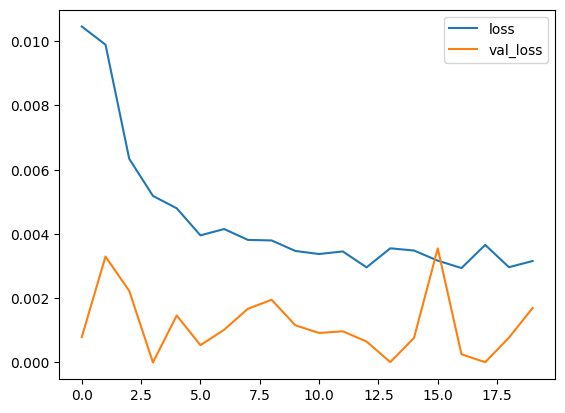

In [166]:
losses.plot()

In [167]:
len(test)

16

In [168]:



test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 20ms/step


<ipython-input-169-0c99d0b30835>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

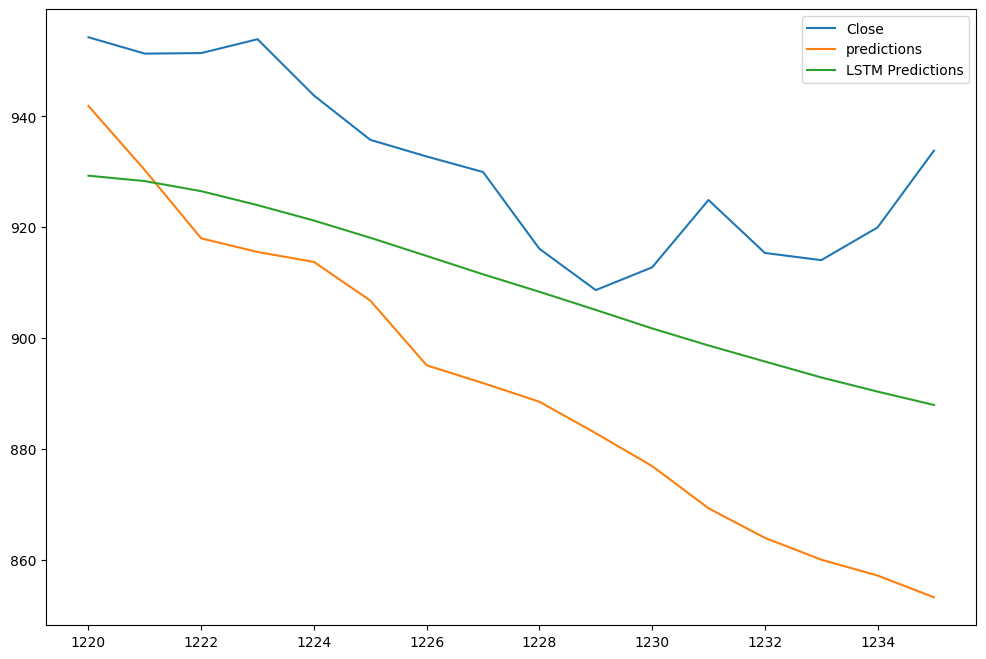

In [169]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [170]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(15):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 22ms/step


In [171]:
forecast = scaler.inverse_transform(forecast)

In [172]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

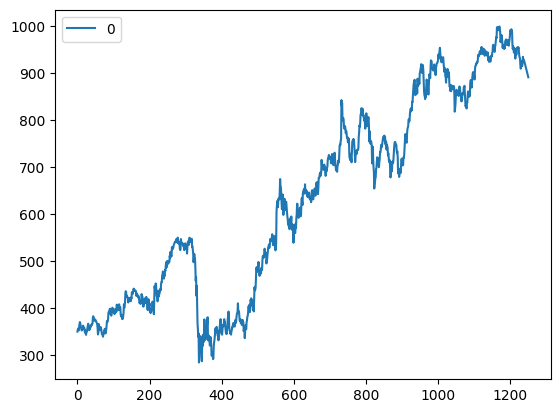

In [173]:
full_data.plot()

In [174]:
forecast

array([[929.28294395],
       [928.30702611],
       [926.49266704],
       [923.97461851],
       [921.19038734],
       [918.09071357],
       [914.81077473],
       [911.49894676],
       [908.34613865],
       [905.07565159],
       [901.73704357],
       [898.66338349],
       [895.76862608],
       [892.89720008],
       [890.33870473]])

In [175]:
full_data.tail(10)

,0
1241,918.090714
1242,914.810775
1243,911.498947
1244,908.346139
1245,905.075652
1246,901.737044
1247,898.663383
1248,895.768626
1249,892.897200
1250,890.338705
